## Importing necessary libraries

In [568]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

style.use("fivethirtyeight") or plt.style.use("fivethirtyeight")

## Importing Datasets

In [569]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Displaying data types

In [570]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [571]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Renaming column names for easier reference

In [572]:
df_train.rename(columns={"PassengerId": "id", "Survived": "survived", 
                   "Pclass": "class", "Name": "name", "Sex": "sex", 
                   "Age": "age", "SibSp": "sibling_spouse", "Parch": "parent_children", "Ticket": "ticket", 
                   "Fare": "fare", "Cabin": "cabin", "Embarked": "embarked"}, inplace=True)

df_test.rename(columns={"PassengerId": "id", "Survived": "survived", 
                   "Pclass": "class", "Name": "name", "Sex": "sex", 
                   "Age": "age", "SibSp": "sibling_spouse", "Parch": "parent_children", "Ticket": "ticket", 
                   "Fare": "fare", "Cabin": "cabin", "Embarked": "embarked"}, inplace=True)

In [573]:
df_train.head(10)

,id,survived,class,name,sex,age,sibling_spouse,parent_children,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Checking for missing values

In [574]:
df_train.isnull().sum()

id                   0
survived             0
class                0
name                 0
sex                  0
age                177
sibling_spouse       0
parent_children      0
ticket               0
fare                 0
cabin              687
embarked             2
dtype: int64

<AxesSubplot:>

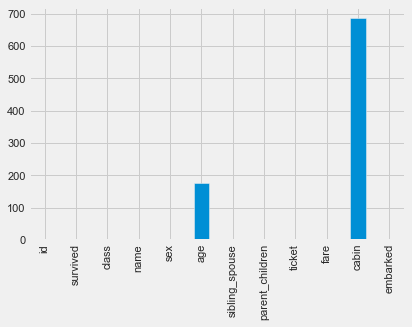

In [575]:
df_train.isnull().sum().plot(kind="bar")

Found missing values in columns: Age, Cabin, Embarked. 
Replacing with median (age) and mode (embarked).

In [576]:
age_median = df_train["age"].median()
df_train["age"] = df_train["age"].fillna(age_median)

from collections import Counter

keys = [k for k, v in Counter(df_train["embarked"]).most_common()]
df_train["embarked"] = df_train["embarked"].fillna(keys[0])

Doing the same for test set

In [577]:
df_train["age"] = df_train["age"].fillna(age_median)
df_train["embarked"] = df_train["embarked"].fillna(keys[0])

## Feature engineering

Dropping unnecessary columns: PassengerId, Name, Ticket, Cabin

In [578]:
df_train = df_train.drop(columns=["id", "name", "ticket", "cabin"])

<AxesSubplot:>

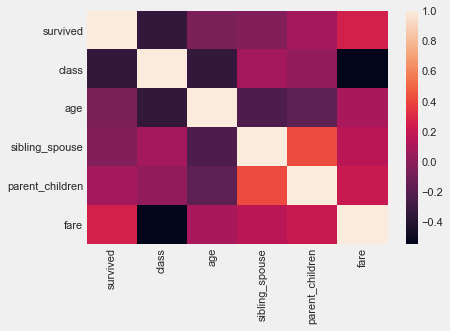

In [579]:
sns.heatmap(df_train.corr())

### 1. Class

In [580]:
df_train["class"].unique()

array([3, 1, 2], dtype=int64)

<AxesSubplot:>

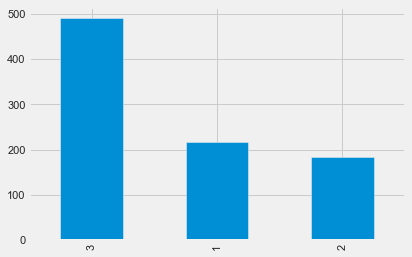

In [581]:
df_train["class"].value_counts().plot(kind="bar")

Showing survived in each passenger class

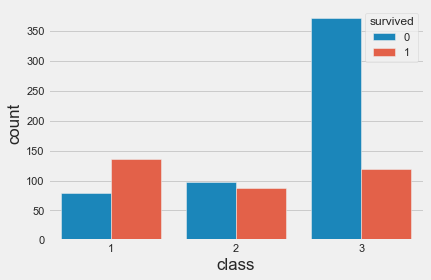

In [582]:
ax = sns.countplot(x=df_train["class"], hue=df_train["survived"])

Counting percentage of passengers in each class who survived 

In [583]:
df_train.groupby("class").survived.value_counts(normalize=True).sort_index()

class  survived
1      0           0.370370
       1           0.629630
2      0           0.527174
       1           0.472826
3      0           0.757637
       1           0.242363
Name: survived, dtype: float64

### 2. Sex

In [584]:
df_train["sex"].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:ylabel='sex'>

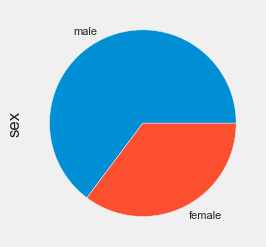

In [586]:
df_train["sex"].value_counts().plot(kind="pie")

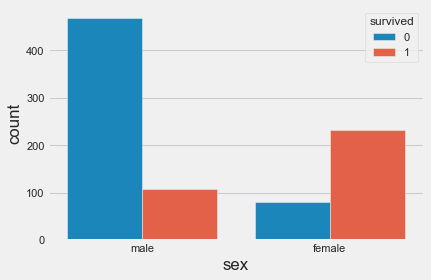

In [587]:
ax = sns.countplot(x=df_train["sex"], hue=df_train["survived"])

In [592]:
df_train.groupby("sex").survived.value_counts(normalize=True).sort_index()

sex     survived
female  0           0.257962
        1           0.742038
male    0           0.811092
        1           0.188908
Name: survived, dtype: float64

### 3. Age

<AxesSubplot:ylabel='Frequency'>

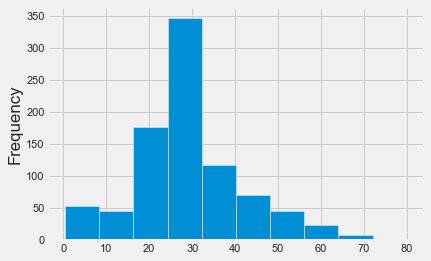

In [597]:
df_train["age"].plot(kind="hist")

In [564]:
# df_train["sex"].rename({"female":0, "male":1}, inplace=True)

# pd.get_dummies(df_train["embarked"], prefix="embarked").head(5)
# df_train = pd.concat([df_train, pd.get_dummies(df_train["embarked"], prefix="embarked")], axis=1)
# df_train = df_train.drop(["embarked"], axis=1)

# x_train = df_train.iloc[:, 2:].values
# y_train = df_train["survived"]

# df_test["sex"] = df_test["sex"].map({"female": 0, "male":1})
# df_test= pd.concat([df_test, pd.get_dummies(df_test["embarked"], prefix="embarked")], axis=1)
# df_test= df_test.drop(["embarked"], axis=1)

# x_test = df_test.iloc[:, 2:]
# y_test = df_test["survived"]

In [547]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    "max_features": [0.5, 1.],
    "max_depth": [5., None],
}

grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 100), parameter_grid, cv=5, verbose=2)

In [548]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.1s
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.1s
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=0.5; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.1s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ....................max_depth=5.0, max_features=1.0; total time=   0.0s
[CV] END ...................max_depth=None, max_features=0.5; total time=   0.0s
[CV] END ...................max_depth=None, max_f

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5.0, None], 'max_features': [0.5, 1.0]},
             verbose=2)

In [549]:
grid_search.cv_results_["mean_test_score"]

array([0.8170548 , 0.81929571, 0.80023225, 0.79686774])

In [550]:
grid_search.best_params_

{'max_depth': 5.0, 'max_features': 1.0}

In [551]:
model = RandomForestClassifier(n_estimators = 50, max_features=1.0, max_depth=5.0, random_state=0)
model = model.fit(x_train, y_train)

In [552]:
y_prediction = model.predict(x_test)

ValueError: could not convert string to float: 'Kelly, Mr. James'

In [ ]:
np.sum(y_prediction == y_test)

In [ ]:
np.sum(y_prediction == y_test) / float(len(y_test))

In [ ]:
np.sum(y_test) / float(len(y_test))